In [2]:
# Ignore warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [4]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [7]:
X_data = mnist.data

y_data = mnist.target

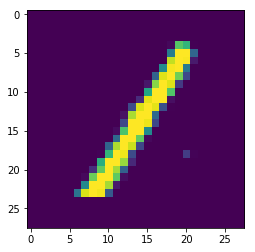

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

# draw one image

plt.imshow(X_data[10000].reshape(28, 28))

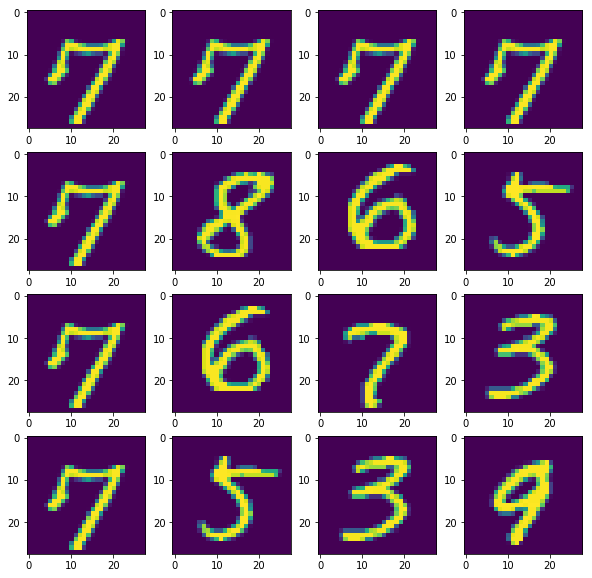

In [38]:
nb_imgs = 4

fig, axes = plt.subplots(nb_imgs, nb_imgs, figsize=(10, 10))

# Fill image to figure

for i in range(nb_imgs):
    for j in range(nb_imgs):
        axes[i][j].imshow(X_test[i * j].reshape(28, 28))

In [21]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [25]:
set(y_test)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [31]:
y_train_5 = (y_train == 5)

In [32]:
y_train_5

array([False, False, False, ..., False, False, False])

In [34]:
# Binary classification 


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [44]:
y_pred = sgd_clf.predict(X_test)

In [47]:
# Cross validation

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [48]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [49]:
# Cross validation score

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.9518793 , 0.95437907, 0.950625  , 0.96812215, 0.95883561])

In [50]:
# Performance measure with confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[49961,  1012],
       [ 1409,  3618]])

In [52]:
# Precision not is number 5

precision_not_5 = 49961 / (49961 + 1409)

precision_not_5

0.9725715398092272

In [53]:
# Precision is number 5

precision_5 = 3618 / (3618 + 1012)

precision_5

0.7814254859611232

In [55]:
# Recall not is number 5

recall_not_5 = 49961 / (49961 + 1012)

recall_not_5

0.9801463519902693

In [57]:
# Recall is number 5

recall_5 = 3618 / (3618 + 1409)

recall_5

0.719713546847026

In [59]:
# F1-Score

def f1_score(precision, recall):
    return 2*precision*recall / (precision + recall)

In [60]:
# F1-Score not 5

f1_score(precision_not_5, recall_not_5)

0.9763442541258317

In [61]:
# F1-Score 5

f1_score(precision_5, recall_5)

0.7493010251630942

In [58]:
# Print classification report

from sklearn.metrics import classification_report

target_names = ['Not 5', 'Is 5']

print(classification_report(y_train_5, y_train_pred, target_names=target_names))

             precision    recall  f1-score   support

      Not 5       0.97      0.98      0.98     50973
       Is 5       0.78      0.72      0.75      5027

avg / total       0.96      0.96      0.96     56000

